# Linear Regression – Class Assessment

Dataset:Fish

In [ ]:
'''
Name- Mayur V Kolki (PGA14)

Here we Have to Do the Linear regression Assesment , we have a dataset of Fish we have to predict the fish Wieght 
which is a continous number. thats why we are using Linear regression to solve this.
we are following the some steps which is common in any project,
1) Import a library which reqired for linear regression 
2) Import a datasets
3) EDA
5) Perform asked Question in assesment
6) Buld a model 
7) perform the Assumption
8) Do the prediction
9) Campare the actual and Prediction
10) Conclude the project output.
'''


In [1]:
#import libraries
import pandas as pd
import numpy as np


In [2]:
#cross- validation

from sklearn.model_selection import train_test_split ,KFold

In [3]:
#OLS library for linear regression
import statsmodels.api as sm

In [4]:
from sklearn.preprocessing import LabelEncoder 

In [5]:
#visualisation
import pylab
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
import scipy.stats as stats

In [8]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
#feature selection for regression [specific]
from sklearn.feature_selection import  f_regression

In [10]:
#read the data 
path ="C:/Users/mayur/Desktop/datascience DELL/pythonstorage/dataset_ML/LinearRegressionusingPython/Linear Regression using Python/Fish_dataset.csv"
fish=pd.read_csv(path)

In [11]:
fish.head()
# Here we found that the data is arrange in a order so need to shuffle the data for better understanding.

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [12]:
# We have to shuffle the data
fish = fish.sample(frac=1)
fish.head(15)

,Species,Weight,Length1,Length2,Length3,Height,Width
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943
62,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
83,Perch,115.0,19.0,21.0,22.5,5.9175,3.3075
52,Roach,290.0,24.0,26.0,29.2,8.8768,4.4968
47,Roach,160.0,21.1,22.5,25.0,6.4000,3.8000
20,Bream,575.0,31.3,34.0,39.5,15.1285,5.5695
113,Perch,700.0,34.0,36.0,38.3,10.6091,6.7408
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600


In [13]:
#data summary 
fish.describe(include="all")

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN
freq,56,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,NaN,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,NaN,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,NaN,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,NaN,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,NaN,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500


In [14]:
fish.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [15]:
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [16]:
fish.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [17]:
#check for 0
fish[fish==0].count()

Species    0
Weight     1
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [18]:
print(fish.loc[fish['Weight']== 0])

   Species  Weight  Length1  Length2  Length3  Height   Width
40   Roach     0.0     19.0     20.5     22.8  6.4752  3.3516


In [19]:
#this is one way
#fish =fish.drop(40,axis=0)

In [20]:
col = ['Species' , 'Weight']
fish[col][fish.Weight==0]
#Here we found that the Roach is a Species where wieght is a zero now can impute the 
#mean wieght of Roach Species.

,Species,Weight
40,Roach,0.0


In [21]:
fish[col][fish.Species=='Roach'].mean()
# Here we found that the mean of wieght is 152.05 when Species is Roach.

Weight    152.05
dtype: float64

In [22]:
# Now store the mean in a object and then impute it.
mean_imp = fish[col][fish.Species=='Roach'].mean()
mean_imp

Weight    152.05
dtype: float64

In [23]:
fish.Weight[fish.Weight==0] = mean_imp

C:\Users\mayur\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


 Now verify the result of our imputation.
 

In [24]:
#check for 0
fish[fish==0].count()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [25]:
fish.shape

(159, 7)

 now there is no any zero present in dataset.

In [26]:
#split the columns into nc and fc
nc=fish.select_dtypes(exclude='object').columns.values
fc=fish.select_dtypes(include='object').columns.values

In [27]:
nc

array(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'],
      dtype=object)

In [28]:
fc

array(['Species'], dtype=object)

In [29]:
 fish.Species.unique()

array(['Roach', 'Parkki', 'Perch', 'Bream', 'Smelt', 'Pike', 'Whitefish'],
      dtype=object)

In [30]:
#'thal' column has invalid  levels that have to be imputed
fish.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

Text(0.5, 1.0, 'Distribution of fish across Species')

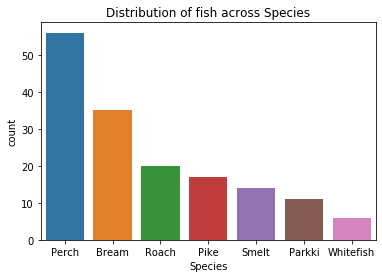

In [31]:
#countplot to check the distribution of orders across Regions 
sns.countplot(x='Species',data=fish,order = fish['Species'].value_counts().index)
plt.title('Distribution of fish across Species')

In [32]:
#dummy varaibles --> is done to aviod baises ness
pd.get_dummies(fish.Species).head()

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
42,0,0,0,0,1,0,0
62,0,1,0,0,0,0,0
74,0,0,1,0,0,0,0
0,1,0,0,0,0,0,0
83,0,0,1,0,0,0,0


In [33]:
fish.Species.head()

42     Roach
62    Parkki
74     Perch
0      Bream
83     Perch
Name: Species, dtype: object

In [34]:
pd.get_dummies(fish.Species,drop_first=True,prefix='Species').head(10)

,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
42,0,0,0,1,0,0
62,1,0,0,0,0,0
74,0,1,0,0,0,0
0,0,0,0,0,0,0
83,0,1,0,0,0,0
52,0,0,0,1,0,0
47,0,0,0,1,0,0
20,0,0,0,0,0,0
113,0,1,0,0,0,0
146,0,0,0,0,1,0


In [35]:
#convert factor to dummmies varraibles
new_fish=fish.copy()

In [36]:
new_fish.shape

(159, 7)

In [37]:
dummy=pd.get_dummies(fish.Species,drop_first=True,prefix='Species')
new_fish= new_fish.join(dummy)


In [38]:
new_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943,0,0,0,1,0,0
62,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142,1,0,0,0,0,0
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320,0,1,0,0,0,0
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
83,Perch,115.0,19.0,21.0,22.5,5.9175,3.3075,0,1,0,0,0,0


In [39]:
new_fish.shape

(159, 13)

In [40]:
 new_fish.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [41]:
new_cols = new_fish.columns
new_cols

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [42]:
#remove the original factor variables
new_cols =list(set(new_cols) -set(fc))
print(new_cols)

['Species_Whitefish', 'Species_Pike', 'Length1', 'Weight', 'Species_Smelt', 'Width', 'Species_Roach', 'Length3', 'Species_Parkki', 'Species_Perch', 'Length2', 'Height']


In [43]:
#refresh the new dataset with the new columns
new_fish = new_fish[new_cols]
new_fish.head()

,Species_Whitefish,Species_Pike,Length1,Weight,Species_Smelt,Width,Species_Roach,Length3,Species_Parkki,Species_Perch,Length2,Height
42,0,0,19.4,120.0,0,3.2943,1,23.7,0,0,21.0,6.1146
62,0,0,14.3,60.0,0,2.3142,0,17.4,1,0,15.5,6.5772
74,0,0,13.8,40.0,0,2.4320,0,16.0,0,1,15.0,3.8240
0,0,0,23.2,242.0,0,4.0200,0,30.0,0,0,25.4,11.5200
83,0,0,19.0,115.0,0,3.3075,0,22.5,0,1,21.0,5.9175


In [44]:
new_fish.dtypes

Species_Whitefish      uint8
Species_Pike           uint8
Length1              float64
Weight               float64
Species_Smelt          uint8
Width                float64
Species_Roach          uint8
Length3              float64
Species_Parkki         uint8
Species_Perch          uint8
Length2              float64
Height               float64
dtype: object

In [45]:
fish.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [46]:
#check the distribution and outliers of features
cols = list(fish.columns)
cols.remove('Species')
cols.remove('Weight')
cols

['Length1', 'Length2', 'Length3', 'Height', 'Width']

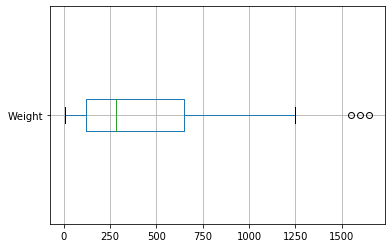

In [47]:
#outliers
fish.boxplot('Weight',vert=False)

In [48]:
fish.Weight.describe()

count     158.000000
mean      400.847468
std       357.697796
min         5.900000
25%       121.250000
50%       281.500000
75%       650.000000
max      1650.000000
Name: Weight, dtype: float64

Detect outlier using IQR 

In [49]:
Q1 = fish.Weight.quantile(0.25)
Q3 = fish.Weight.quantile(0.75)
Q1, Q3

(121.25, 650.0)

In [50]:
IQR = Q3 - Q1
IQR

528.75

In [51]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-671.875, 1443.125)

 Here are the outliers

In [52]:
fish[(fish.Weight<lower_limit)|(fish.Weight>upper_limit)]

,Species,Weight,Length1,Length2,Length3,Height,Width
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


 Remove outliers

In [53]:

df_no_outlier = fish[(fish.Weight>lower_limit)&(fish.Weight<upper_limit)]
df_no_outlier

,Species,Weight,Length1,Length2,Length3,Height,Width
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943
62,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
83,Perch,115.0,19.0,21.0,22.5,5.9175,3.3075
...,...,...,...,...,...,...,...
85,Perch,130.0,19.3,21.3,22.8,6.3840,3.5340
151,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
53,Roach,272.0,25.0,27.0,30.6,8.5680,4.7736
138,Pike,567.0,43.2,46.0,48.7,7.7920,4.8700


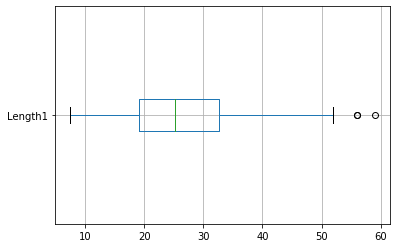

In [54]:
#outliers
fish.boxplot('Length1',vert=False)

In [55]:
fish.Length1.describe()

count    159.000000
mean      26.247170
std        9.996441
min        7.500000
25%       19.050000
50%       25.200000
75%       32.700000
max       59.000000
Name: Length1, dtype: float64

In [56]:
Q1 = fish.Length1.quantile(0.25)
Q3 = fish.Length1.quantile(0.75)
Q1, Q3

(19.05, 32.7)

In [57]:
IQR = Q3 - Q1
IQR

13.650000000000002

In [58]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1.4250000000000007, 53.175000000000004)

In [59]:
fish[(fish.Length1<lower_limit)|(fish.Length1>upper_limit)]

,Species,Weight,Length1,Length2,Length3,Height,Width
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [60]:

df_no_outlier = fish[(fish.Length1>lower_limit)&(fish.Length1<upper_limit)]
df_no_outlier

,Species,Weight,Length1,Length2,Length3,Height,Width
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943
62,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
83,Perch,115.0,19.0,21.0,22.5,5.9175,3.3075
...,...,...,...,...,...,...,...
85,Perch,130.0,19.3,21.3,22.8,6.3840,3.5340
151,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
53,Roach,272.0,25.0,27.0,30.6,8.5680,4.7736
138,Pike,567.0,43.2,46.0,48.7,7.7920,4.8700


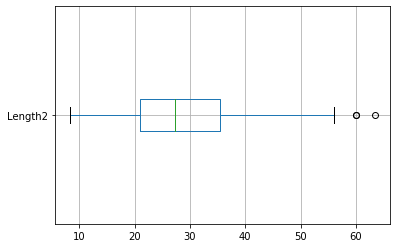

In [61]:
#outliers
fish.boxplot('Length2',vert=False)

In [62]:
fish.Length2.describe()

count    159.000000
mean      28.415723
std       10.716328
min        8.400000
25%       21.000000
50%       27.300000
75%       35.500000
max       63.400000
Name: Length2, dtype: float64

In [63]:
Q1 = fish.Length2.quantile(0.25)
Q3 = fish.Length2.quantile(0.75)
Q1, Q3

(21.0, 35.5)

In [64]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(0.5249999999999986, 55.975)

In [65]:
fish[(fish.Length2<lower_limit)|(fish.Length2>upper_limit)]

,Species,Weight,Length1,Length2,Length3,Height,Width
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800


In [66]:
df_no_outlier = fish[(fish.Length2>lower_limit)&(fish.Length2<upper_limit)]
df_no_outlier

,Species,Weight,Length1,Length2,Length3,Height,Width
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943
62,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
83,Perch,115.0,19.0,21.0,22.5,5.9175,3.3075
...,...,...,...,...,...,...,...
85,Perch,130.0,19.3,21.3,22.8,6.3840,3.5340
151,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
53,Roach,272.0,25.0,27.0,30.6,8.5680,4.7736
138,Pike,567.0,43.2,46.0,48.7,7.7920,4.8700


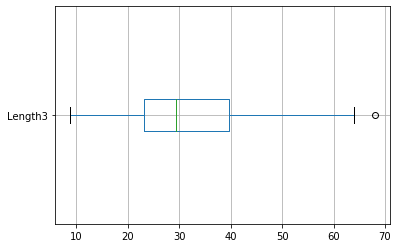

In [67]:
#outliers
fish.boxplot('Length3',vert=False)

In [68]:
fish.Length3.describe()

count    159.000000
mean      31.227044
std       11.610246
min        8.800000
25%       23.150000
50%       29.400000
75%       39.650000
max       68.000000
Name: Length3, dtype: float64

In [69]:
Q1 = fish.Length3.quantile(0.25)
Q3 = fish.Length3.quantile(0.75)
Q1, Q3

(23.15, 39.650000000000006)

In [70]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(2.674999999999997, 60.12500000000001)

In [71]:
fish[(fish.Length3<lower_limit)|(fish.Length3>upper_limit)]

,Species,Weight,Length1,Length2,Length3,Height,Width
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [72]:
df_no_outlier = fish[(fish.Length3>lower_limit)&(fish.Length3<upper_limit)]
df_no_outlier

,Species,Weight,Length1,Length2,Length3,Height,Width
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943
62,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
83,Perch,115.0,19.0,21.0,22.5,5.9175,3.3075
...,...,...,...,...,...,...,...
85,Perch,130.0,19.3,21.3,22.8,6.3840,3.5340
151,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
53,Roach,272.0,25.0,27.0,30.6,8.5680,4.7736
138,Pike,567.0,43.2,46.0,48.7,7.7920,4.8700


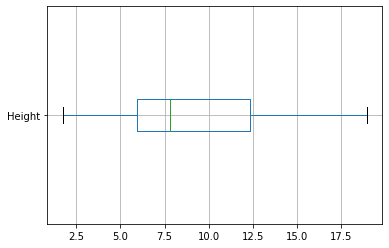

In [73]:
#outliers
fish.boxplot('Height',vert=False)

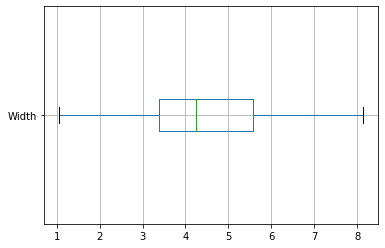

In [74]:
#outliers
fish.boxplot('Width',vert=False)

In [75]:
fish=fish.drop([142,143,144],axis=0)


In [76]:
pd.set_option("display.max.rows",None)

In [77]:
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
42,Roach,120.0,19.4,21.0,23.7,6.1146,3.2943
62,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
83,Perch,115.0,19.0,21.0,22.5,5.9175,3.3075
52,Roach,290.0,24.0,26.0,29.2,8.8768,4.4968
47,Roach,160.0,21.1,22.5,25.0,6.4000,3.8000
20,Bream,575.0,31.3,34.0,39.5,15.1285,5.5695
113,Perch,700.0,34.0,36.0,38.3,10.6091,6.7408
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600


In [78]:
nrow = 4; ncol = 2; npos =1 

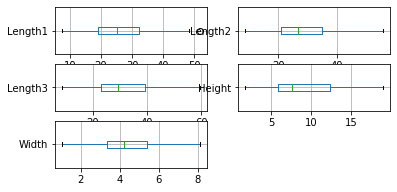

In [79]:
fig = plt.figure()
for c in cols:
    fig.add_subplot(nrow,ncol,npos)
    fish.boxplot(c,vert=False)
    npos+=1

In [80]:
nrow = 4; ncol = 2; npos =1 

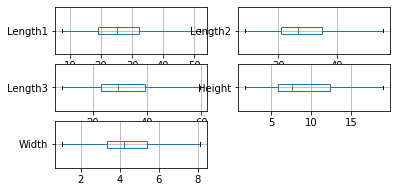

In [81]:
#whis=<n> indicates the IQR formula. can override the default 1.5 to any value to suppress the outliers from appering on the boxplot
fig = plt.figure()
for c in cols:
    fig.add_subplot(nrow,ncol,npos)
    fish.boxplot(c,vert=False,whis = 5)
    npos+=1

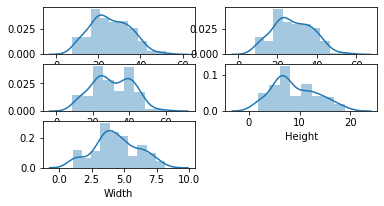

In [82]:
#distplot
nrow = 4; ncol = 2; npos =1 
fig = plt.figure()
for c in cols:
    fig.add_subplot(nrow,ncol,npos)
    sns.distplot(fish[c])
    npos+=1

# Agistino-Person test for normality
H0: normal distribution
H1: not a normal distribution

In [83]:
from scipy.stats import normaltest

#create a K-v  pair to store column names and its corresponding distribution type (Normal/NOt normal)

aptest = {}

for c in cols:
    tstat,pval = normaltest(fish[c])
    if pval< 0.05:
        aptest[c] = "not Normal Test"
    else:
        aptest[c] = "Normal"

In [84]:
aptest

{'Length1': 'Normal',
 'Length2': 'Normal',
 'Length3': 'not Normal Test',
 'Height': 'not Normal Test',
 'Width': 'Normal'}

Text(0.5, 1, 'Correlation Matrix')

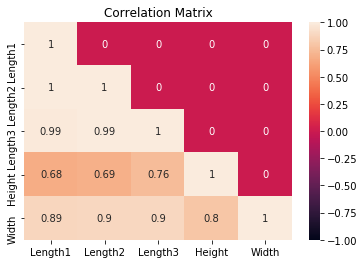

In [85]:
#correlation matrix - take only the lower triangle,then plot the heat map
cor = fish[cols].corr()
cor = np.tril(cor)
sns.heatmap(cor,xticklabels=cols,yticklabels=cols,vmin=-1,vmax=1,annot=True,square=False)
plt.title('Correlation Matrix')

base on the matrix there are some correlated variables that needs to be removed.

for linear regression, datatypes  have to be numeric

In [86]:
fish.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [87]:
new_fish.dtypes

Species_Whitefish      uint8
Species_Pike           uint8
Length1              float64
Weight               float64
Species_Smelt          uint8
Width                float64
Species_Roach          uint8
Length3              float64
Species_Parkki         uint8
Species_Perch          uint8
Length2              float64
Height               float64
dtype: object

In [88]:
new_fish=new_fish.drop([142,143,144],axis=0)

In [89]:
new_fish

,Species_Whitefish,Species_Pike,Length1,Weight,Species_Smelt,Width,Species_Roach,Length3,Species_Parkki,Species_Perch,Length2,Height
42,0,0,19.4,120.0,0,3.2943,1,23.7,0,0,21.0,6.1146
62,0,0,14.3,60.0,0,2.3142,0,17.4,1,0,15.5,6.5772
74,0,0,13.8,40.0,0,2.4320,0,16.0,0,1,15.0,3.8240
0,0,0,23.2,242.0,0,4.0200,0,30.0,0,0,25.4,11.5200
83,0,0,19.0,115.0,0,3.3075,0,22.5,0,1,21.0,5.9175
52,0,0,24.0,290.0,0,4.4968,1,29.2,0,0,26.0,8.8768
47,0,0,21.1,160.0,0,3.8000,1,25.0,0,0,22.5,6.4000
20,0,0,31.3,575.0,0,5.5695,0,39.5,0,0,34.0,15.1285
113,0,0,34.0,700.0,0,6.7408,0,38.3,0,1,36.0,10.6091
146,0,0,10.0,7.5,1,1.1600,0,11.6,0,0,10.5,1.9720


split the data into train/test

trainx/trainy

testx/testy

In [90]:
trainx,testx,trainy,testy = train_test_split(new_fish.drop('Weight',axis=1),new_fish['Weight'],test_size =0.3)

In [91]:
print("trainx={},trainy={},testx={},testy ={}".format(trainx.shape,trainy.shape,testx.shape,testy.shape))

trainx=(109, 11),trainy=(109,),testx=(47, 11),testy =(47,)


In [92]:
testy.head()

10     475.0
102    300.0
52     290.0
140    950.0
97     145.0
Name: Weight, dtype: float64

In [93]:
trainy.head()

29     1000.0
4       430.0
109     514.0
0       242.0
6       500.0
Name: Weight, dtype: float64

In [94]:
trainx.head()

,Species_Whitefish,Species_Pike,Length1,Species_Smelt,Width,Species_Roach,Length3,Species_Parkki,Species_Perch,Length2,Height
29,0,0,33.5,0,6.6030,0,42.6,0,0,37.0,18.9570
4,0,0,26.5,0,5.1340,0,34.0,0,0,29.0,12.4440
109,0,0,30.5,0,6.0180,0,34.0,0,1,32.8,10.0300
0,0,0,23.2,0,4.0200,0,30.0,0,0,25.4,11.5200
6,0,0,26.8,0,5.2785,0,34.5,0,0,29.7,14.1795


# regression model building

#OLS-> Ordinary Least Square method

In [95]:
m1=  sm.OLS(trainy,trainx).fit()

In [96]:
#summarise the model
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Weight   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              293.6
Date:                Wed, 24 Mar 2021   Prob (F-statistic):                    8.34e-70
Time:                        17:16:13   Log-Likelihood:                         -640.46
No. Observations:                 109   AIC:                                      1303.
Df Residuals:                      98   BIC:                                      1333.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Species_Whitefish  -281.5688     67.859     -4.149      0.000    -416.233    -146.905
Species_Pike       -369.6723    122.113     -3.027      0.003    -612.002    -127.343
Length1              47.5950     42.155      1.129      0.262     -36.059     131.249
Species_Smelt      -219.4019     43.562     -5.037      0.000    -305.850    -132.954
Width               134.3384     24.985      5.377      0.000      84.757     183.920
Species_Roach      -339.3224     47.010     -7.218      0.000    -432.613    -246.032
Length3            -137.9366     22.197     -6.214      0.000    -181.986     -93.888
Species_Parkki     -313.3747     34.871     -8.987      0.000    -382.575    -244.175
Species_Perch      -480.4673     47.974    -10.015      0.000    -575.670    -385.265
Length2             107.7573     48.503      2.222      0.029      11.505     204.010
Height               10.3661     15.121      0.686      0.495     -19.641      40.373
==============================================================================
Omnibus:                       10.049   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.377
Skew:                           0.557   Prob(JB):                      0.00338
Kurtosis:                       4.125   Cond. No.                         869.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
#prediction on the test data
p1=m1.predict(testx)
p1

10     532.409321
102    478.334761
52     273.009726
140    821.472137
97     215.343330
88     137.463341
36      41.050601
137    587.309319
146    -35.790106
30     765.627854
100    309.786842
25     626.186441
51     249.159017
32     831.976493
11     508.909184
40     146.424202
90     194.512335
123    804.950676
56     334.669920
108    436.549914
134    493.841570
43     159.772656
59     787.464316
83      88.833540
49     105.875852
93     162.134488
14     565.941153
69     214.700844
115    697.298258
12     487.896895
42      83.762337
62      16.441063
151    -21.598330
17     545.392739
103    362.057121
122    739.384549
39     183.486347
82     119.749934
77      82.175059
84     134.863004
58     718.423016
31     777.988715
75       7.746971
98     261.496831
101    333.754411
46     150.870326
53     269.234654
dtype: float64

In [98]:
#Add a constant term to the trainx and testx
#this will ensure that the model summary has the 'intercept' term displayed
trainx =  sm.add_constant(trainx)
testx  = sm.add_constant(testx)


In [99]:
#Linear Regression model building 
#OLS-> 
m1=sm.OLS(trainy,trainx).fit()

In [100]:
#summarise the model 
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     149.5
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           1.09e-55
Time:                        17:16:31   Log-Likelihood:                -627.50
No. Observations:                 109   AIC:                             1279.
Df Residuals:                      97   BIC:                             1311.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -687.5755    134.785     -5.101      0.000    -955.087    -420.064
Species_Whitefish   120.0607     99.332      1.209      0.230     -77.086     317.207
Species_Pike        105.2191    143.335      0.734      0.465    -179.261     389.699
Length1              -5.2836     39.026     -0.135      0.893     -82.739      72.172
Species_Smelt       380.8401    123.923      3.073      0.003     134.888     626.792
Width                67.4646     25.867      2.608      0.011      16.125     118.804
Species_Roach        98.2127     95.483      1.029      0.306     -91.294     287.720
Length3             -20.8641     30.318     -0.688      0.493     -81.037      39.309
Species_Parkki       47.4416     77.275      0.614      0.541    -105.929     200.812
Species_Perch       109.6530    123.351      0.889      0.376    -135.165     354.471
Length2              39.4440     45.314      0.870      0.386     -50.492     129.380
Height               38.4326     14.574      2.637      0.010       9.507      67.359
==============================================================================
Omnibus:                       28.279   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.392
Skew:                           1.128   Prob(JB):                     3.10e-11
Kurtosis:                       5.360   Cond. No.                     1.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
#validation of LR assumptions
#1) mean of residuals =0
print(m1.resid.mean())

-1.1717436399346606e-12


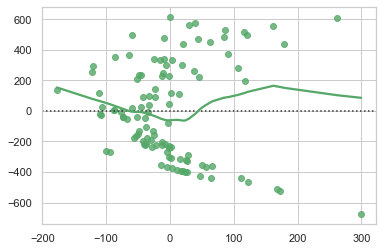

In [102]:
#2) residuals have constant variance(homoscedasticity)
#plot the graph   #spread of errors
#lowess -> locally weighted scatterplot smoothing
yhat = m1.predict(trainx)
sns.set(style = "whitegrid")
sns.residplot(m1.resid,yhat,lowess=True,color='g')

In [103]:
#bruesch-pagan test against hetroscedasticity
import statsmodels.stats.api as sms

#H0: homoscedasticity
#H1:  hetroscedasticity

#return value of breusch pagan
#lagrange_multiplier , pvalue, fscore, fp-value

#parameters: [residuals,x-arrays]
pval = sms.het_breuschpagan(m1.resid,m1.model.exog)[1]

if pval<0.05:
    print("Reject H0. Model is Heteroscedastic")
else:
    print("FTR H0. Model is Homoscedastic")


FTR H0. Model is Homoscedastic


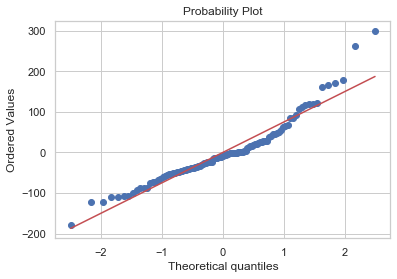

In [104]:
#3) residuals have a normal distribution
stats.probplot(m1.resid,dist='norm',plot=pylab)
pylab.show()

In [105]:
#4) rows> columns
new_fish.shape

(156, 12)

In [106]:
#prediction on the test data
p1=m1.predict(testx)
p1

10     522.360653
102    433.410546
52     344.674282
140    811.478787
97     223.517725
88     166.501277
36      11.788188
137    567.029289
146    -33.385891
30     844.639615
100    282.485251
25     708.735589
51     233.695757
32     910.187801
11     505.411602
40     118.120772
90     175.630470
123    897.441678
56     338.768424
108    413.806810
134    504.754442
43     131.645777
59     759.466978
83     131.133235
49     171.064593
93     176.866172
14     566.730011
69     261.549495
115    714.548843
12     465.189166
42      99.227061
62     -58.438471
151     -2.624672
17     574.937994
103    337.522512
122    792.325737
39     118.086599
82     139.183382
77      70.683847
84     146.773149
58     650.907281
31     847.571461
75     -23.009808
98     266.175227
101    306.114722
46     141.620571
53     356.431047
dtype: float64

In [107]:
#store the actual amd predicted data for comparison
df=  pd.DataFrame({'actual':testy,'predicted':round(p1,3)})
df.head(30)

,actual,predicted
10,475.0,522.361
102,300.0,433.411
52,290.0,344.674
140,950.0,811.479
97,145.0,223.518
88,130.0,166.501
36,69.0,11.788
137,500.0,567.029
146,7.5,-33.386
30,920.0,844.640


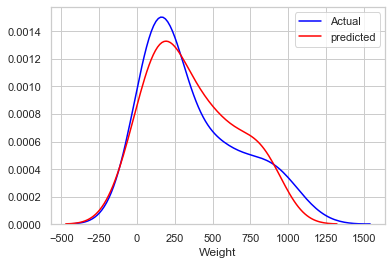

In [108]:
#plot the actual and predicted values
ax1=sns.distplot(testy,hist=False,color='blue',label ='Actual')
sns.distplot(p1,hist=False,color='red',label='predicted',ax=ax1)

In [109]:
#other considerations
#VIF (Variance Inflation Factor)
vif=pd.DataFrame()

vif['inflation']=[variance_inflation_factor(trainx.values,i)
for i in range (trainx.shape[1])]

vif['features'] =list(trainx.columns)

vif

,inflation,features
0,300.703224,const
1,4.371252,Species_Whitefish
2,30.854770,Species_Pike
3,2245.134453,Length1
4,24.903137,Species_Smelt
5,35.128723,Width
6,12.574332,Species_Roach
7,1849.521505,Length3
8,7.487288,Species_Parkki
9,57.191087,Species_Perch


In [110]:
new_fish

,Species_Whitefish,Species_Pike,Length1,Weight,Species_Smelt,Width,Species_Roach,Length3,Species_Parkki,Species_Perch,Length2,Height
42,0,0,19.4,120.0,0,3.2943,1,23.7,0,0,21.0,6.1146
62,0,0,14.3,60.0,0,2.3142,0,17.4,1,0,15.5,6.5772
74,0,0,13.8,40.0,0,2.4320,0,16.0,0,1,15.0,3.8240
0,0,0,23.2,242.0,0,4.0200,0,30.0,0,0,25.4,11.5200
83,0,0,19.0,115.0,0,3.3075,0,22.5,0,1,21.0,5.9175
52,0,0,24.0,290.0,0,4.4968,1,29.2,0,0,26.0,8.8768
47,0,0,21.1,160.0,0,3.8000,1,25.0,0,0,22.5,6.4000
20,0,0,31.3,575.0,0,5.5695,0,39.5,0,0,34.0,15.1285
113,0,0,34.0,700.0,0,6.7408,0,38.3,0,1,36.0,10.6091
146,0,0,10.0,7.5,1,1.1600,0,11.6,0,0,10.5,1.9720


In [128]:
fish.Weight

42      120.0
62       60.0
74       40.0
0       242.0
83      115.0
52      290.0
47      160.0
20      575.0
113     700.0
146       7.5
9       500.0
49      161.0
158      19.9
100     197.0
75       51.5
7       390.0
132     430.0
72        5.9
78       78.0
86      120.0
136     540.0
134     456.0
121    1015.0
39      120.0
99      180.0
34      950.0
31      955.0
15      600.0
65      150.0
145       6.7
40        NaN
157      19.7
77      100.0
110     556.0
38       87.0
67      170.0
17      700.0
81       85.0
33      975.0
46      140.0
57      306.0
54      390.0
141    1250.0
37       78.0
43      150.0
64      120.0
66      140.0
1       290.0
111     840.0
95      170.0
50      200.0
149       9.8
131     300.0
35       40.0
51      180.0
63       90.0
26      720.0
125    1100.0
147       7.0
14      600.0
137     500.0
56      270.0
114     700.0
12      500.0
108     320.0
32      925.0
11      500.0
30      920.0
29     1000.0
27      714.0
98      188.0
19    

In [111]:
from scipy.stats import boxcox

Weight_values,lamdaWeight = boxcox(fish['Weight'])

C:\Users\mayur\anaconda3\lib\site-packages\scipy\stats\morestats.py:1044: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


In [112]:
Weight_values

array([4.86533764e+16, 1.37008016e+14, 4.41445319e+12, 1.85359403e+19,
       3.39249379e+16, 8.58573247e+19, 5.56686807e+17, 2.83326937e+22,
       1.49990614e+23, 3.05946114e+06, 8.67056742e+21, 5.86861508e+17,
       1.19142512e+10, 3.24366933e+18, 3.75552294e+13, 1.05647284e+21,
       2.41606994e+21, 4.00654381e+05, 1.26499711e+15, 4.86533764e+16,
       1.66424827e+22, 3.97299809e+21, 3.49297691e+24, 4.86533764e+16,
       1.51001773e+18, 1.99381971e+24, 2.08449268e+24, 4.06332715e+22,
       3.22216500e+17, 1.17658949e+06,            nan, 1.09370642e+10,
       1.03819448e+16, 2.13134394e+22, 3.19063855e+15, 9.30407653e+17,
       1.49990614e+23, 2.62003002e+15, 2.48462092e+24, 1.79595429e+17,
       1.35324555e+20, 1.05647284e+21, 2.03915068e+25, 1.26499711e+15,
       3.22216500e+17, 4.86533764e+16, 1.79595429e+17, 8.58573247e+19,
       7.02907786e+23, 9.30407653e+17, 3.68676725e+18, 2.94991174e+07,
       1.14423383e+20, 4.41445319e+12, 1.51001773e+18, 4.25221328e+15,
      

In [113]:
len(Weight_values)

156

In [114]:
lamdaWeight

8.472135811722177

In [115]:
wgt = Weight_values[0]
wgt

4.8653376426096824e+16

In [116]:
new_fish.head()

,Species_Whitefish,Species_Pike,Length1,Weight,Species_Smelt,Width,Species_Roach,Length3,Species_Parkki,Species_Perch,Length2,Height
42,0,0,19.4,120.0,0,3.2943,1,23.7,0,0,21.0,6.1146
62,0,0,14.3,60.0,0,2.3142,0,17.4,1,0,15.5,6.5772
74,0,0,13.8,40.0,0,2.4320,0,16.0,0,1,15.0,3.8240
0,0,0,23.2,242.0,0,4.0200,0,30.0,0,0,25.4,11.5200
83,0,0,19.0,115.0,0,3.3075,0,22.5,0,1,21.0,5.9175


In [117]:
new_fish =new_fish.drop('Weight',axis=1)

In [118]:
new_fish.head()

,Species_Whitefish,Species_Pike,Length1,Species_Smelt,Width,Species_Roach,Length3,Species_Parkki,Species_Perch,Length2,Height
42,0,0,19.4,0,3.2943,1,23.7,0,0,21.0,6.1146
62,0,0,14.3,0,2.3142,0,17.4,1,0,15.5,6.5772
74,0,0,13.8,0,2.4320,0,16.0,0,1,15.0,3.8240
0,0,0,23.2,0,4.0200,0,30.0,0,0,25.4,11.5200
83,0,0,19.0,0,3.3075,0,22.5,0,1,21.0,5.9175


In [119]:
new_fish['Weight1']=Weight_values

In [120]:
Weight_values

array([4.86533764e+16, 1.37008016e+14, 4.41445319e+12, 1.85359403e+19,
       3.39249379e+16, 8.58573247e+19, 5.56686807e+17, 2.83326937e+22,
       1.49990614e+23, 3.05946114e+06, 8.67056742e+21, 5.86861508e+17,
       1.19142512e+10, 3.24366933e+18, 3.75552294e+13, 1.05647284e+21,
       2.41606994e+21, 4.00654381e+05, 1.26499711e+15, 4.86533764e+16,
       1.66424827e+22, 3.97299809e+21, 3.49297691e+24, 4.86533764e+16,
       1.51001773e+18, 1.99381971e+24, 2.08449268e+24, 4.06332715e+22,
       3.22216500e+17, 1.17658949e+06,            nan, 1.09370642e+10,
       1.03819448e+16, 2.13134394e+22, 3.19063855e+15, 9.30407653e+17,
       1.49990614e+23, 2.62003002e+15, 2.48462092e+24, 1.79595429e+17,
       1.35324555e+20, 1.05647284e+21, 2.03915068e+25, 1.26499711e+15,
       3.22216500e+17, 4.86533764e+16, 1.79595429e+17, 8.58573247e+19,
       7.02907786e+23, 9.30407653e+17, 3.68676725e+18, 2.94991174e+07,
       1.14423383e+20, 4.41445319e+12, 1.51001773e+18, 4.25221328e+15,
      

In [121]:
new_fish

,Species_Whitefish,Species_Pike,Length1,Species_Smelt,Width,Species_Roach,Length3,Species_Parkki,Species_Perch,Length2,Height,Weight1
42,0,0,19.4,0,3.2943,1,23.7,0,0,21.0,6.1146,4.865338e+16
62,0,0,14.3,0,2.3142,0,17.4,1,0,15.5,6.5772,1.370080e+14
74,0,0,13.8,0,2.4320,0,16.0,0,1,15.0,3.8240,4.414453e+12
0,0,0,23.2,0,4.0200,0,30.0,0,0,25.4,11.5200,1.853594e+19
83,0,0,19.0,0,3.3075,0,22.5,0,1,21.0,5.9175,3.392494e+16
52,0,0,24.0,0,4.4968,1,29.2,0,0,26.0,8.8768,8.585732e+19
47,0,0,21.1,0,3.8000,1,25.0,0,0,22.5,6.4000,5.566868e+17
20,0,0,31.3,0,5.5695,0,39.5,0,0,34.0,15.1285,2.833269e+22
113,0,0,34.0,0,6.7408,0,38.3,0,1,36.0,10.6091,1.499906e+23
146,0,0,10.0,1,1.1600,0,11.6,0,0,10.5,1.9720,3.059461e+06


Text(0.5, 1.0, ' Distribution')

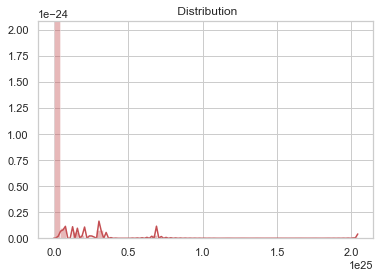

In [123]:
#6) Distribution plot 
sns.distplot(Weight_values,hist=True,color='r',label='Quantity')
plt.title(' Distribution')


In [124]:
trainx,testx,trainy,testy = train_test_split(new_fish.drop('Weight1',axis=1),new_fish['Weight1'],test_size =0.3)

In [125]:
print("trainx={},trainy={},testx={},testy ={}".format(trainx.shape,trainy.shape,testx.shape,testy.shape))

trainx=(109, 11),trainy=(109,),testx=(47, 11),testy =(47,)


In [126]:
m1=  sm.OLS(trainy,trainx).fit()

In [127]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Weight1   R-squared (uncentered):                   0.403
Model:                            OLS   Adj. R-squared (uncentered):              0.336
Method:                 Least Squares   F-statistic:                              6.015
Date:                Wed, 24 Mar 2021   Prob (F-statistic):                    1.99e-07
Time:                        17:22:04   Log-Likelihood:                         -6237.9
No. Observations:                 109   AIC:                                  1.250e+04
Df Residuals:                      98   BIC:                                  1.253e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Species_Whitefish -4.447e+24   1.22e+24     -3.632      0.000   -6.88e+24   -2.02e+24
Species_Pike      -7.157e+24   2.67e+24     -2.677      0.009   -1.25e+25   -1.85e+24
Length1           -2.727e+24   8.54e+23     -3.195      0.002   -4.42e+24   -1.03e+24
Species_Smelt     -1.838e+24   9.35e+23     -1.966      0.052   -3.69e+24     1.7e+22
Width              3.988e+23   5.75e+23      0.693      0.490   -7.43e+23    1.54e+24
Species_Roach     -3.132e+24   9.44e+23     -3.319      0.001   -5.01e+24   -1.26e+24
Length3           -8.283e+23   4.81e+23     -1.722      0.088   -1.78e+24    1.26e+23
Species_Parkki    -9.755e+23   7.44e+23     -1.312      0.193   -2.45e+24       5e+23
Species_Perch     -5.307e+24   9.96e+23     -5.328      0.000   -7.28e+24   -3.33e+24
Length2            3.743e+24    9.8e+23      3.819      0.000     1.8e+24    5.69e+24
Height            -7.244e+23   3.25e+23     -2.227      0.028   -1.37e+24    -7.9e+22
==============================================================================
Omnibus:                      155.804   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7602.901
Skew:                           5.134   Prob(JB):                         0.00
Kurtosis:                      42.605   Cond. No.                         929.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
p1=m1.predict(testx)
p1

In [ ]:
# MSE of model 1
mse1 = round(mean_squared_error(testy,p1),3)
mse1
# compare the train and test errors
#print("Training MSE = {}, Testing MSE ={}". format(np.mean(cv_mse),mse1))



In [ ]:
# store the actual and predicted data for comparision
df = pd.DataFrame({'actual':testy, 'predicted':round(p1,3)})
df.head(30)

In [ ]:
mse1

In [ ]:
import math

math.sqrt(mse1)

In [ ]:
fish